In [23]:
import numpy as np
from netCDF4 import Dataset
from nco import Nco
import glob
import pyproj as proj
from mpl_toolkits.basemap import Basemap
from numpy import ma

In [24]:
p1 = proj.Proj(proj='longlat',a=6370000,b=6370000) # WRF spherical lat lons

In [25]:
p2 = proj.Proj(proj='lcc',lat_1=28,lat_2=50,lat_0=39.700012207,lon_0=-98,x_0=0,y_0=0,a=6370000,
               b=6370000,units='m') # WRF hydro LCC projection

In [26]:
fl = './geo_em.d01_crop.nc'
geo = Dataset(fl,'r','NETCDF') # open the cropped geogrid netCDFs

In [27]:
# extract lats and longs from the geogrid
XLATS = geo['XLAT_M'][0]
XLONGS = geo['XLONG_M'][0]

In [28]:
X,Y = proj.transform(p1,p2,XLONGS,XLATS) # project lat longs to WRF LCC

In [29]:
fl = './annual/wrf2d_d01_2001_thinned_crop.nc'
wrf01 = Dataset(fl,'r','NETCDF') # open cropped data set

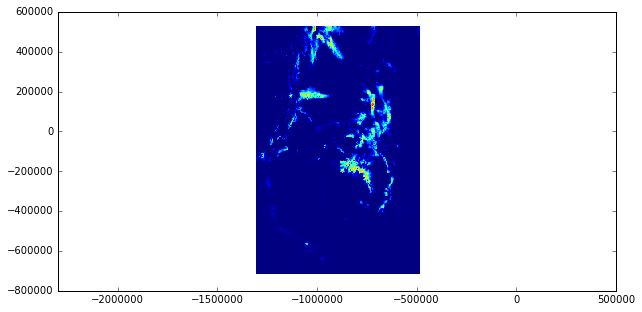

In [30]:
# plot the data using the WRF LCC projected lats and longs
plt.figure(figsize=(10,5));
plt.pcolormesh(X,Y,wrf01['SNOW'][0]);
plt.axis('equal');

This looks good to me, but we want to make sure the domain is in the right place. Plot it with Basemap to draw parallels, meridians, and States. 

In [31]:
# We assume Basemap projects WGS84 lat longs so convert WRF spherical lat longs to WGS84
#p3 = proj.Proj(proj='longlat',ellps='WGS84',datum='WGS84') # doms box projection
p3 = proj.Proj("+init=EPSG:4326")
XLONGS3,XLATS3 = proj.transform(p1,p3,XLONGS,XLATS)

In [32]:
map = Basemap(width=4000000,height=1500000,rsphere=(6370000,6370000),projection='lcc',
              lat_1=28,lat_2=50,lat_0=39.700012207,lon_0=-98) # make a Basemap projection with a new center over dom's box

In [33]:
X2,Y2 = map(XLONGS3,XLATS3) # project the WGS84 coordinates to to LCC

(0.0, 250.0, 0.0, 350.0)

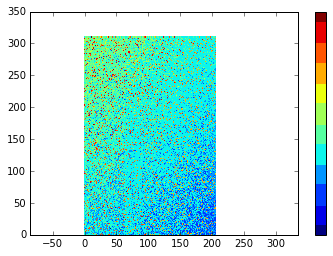

In [34]:
plt.pcolormesh(X-X2)
plt.colorbar()
plt.axis('equal')

In [35]:
np.mean(Y-Y2)

-749999.99999999988

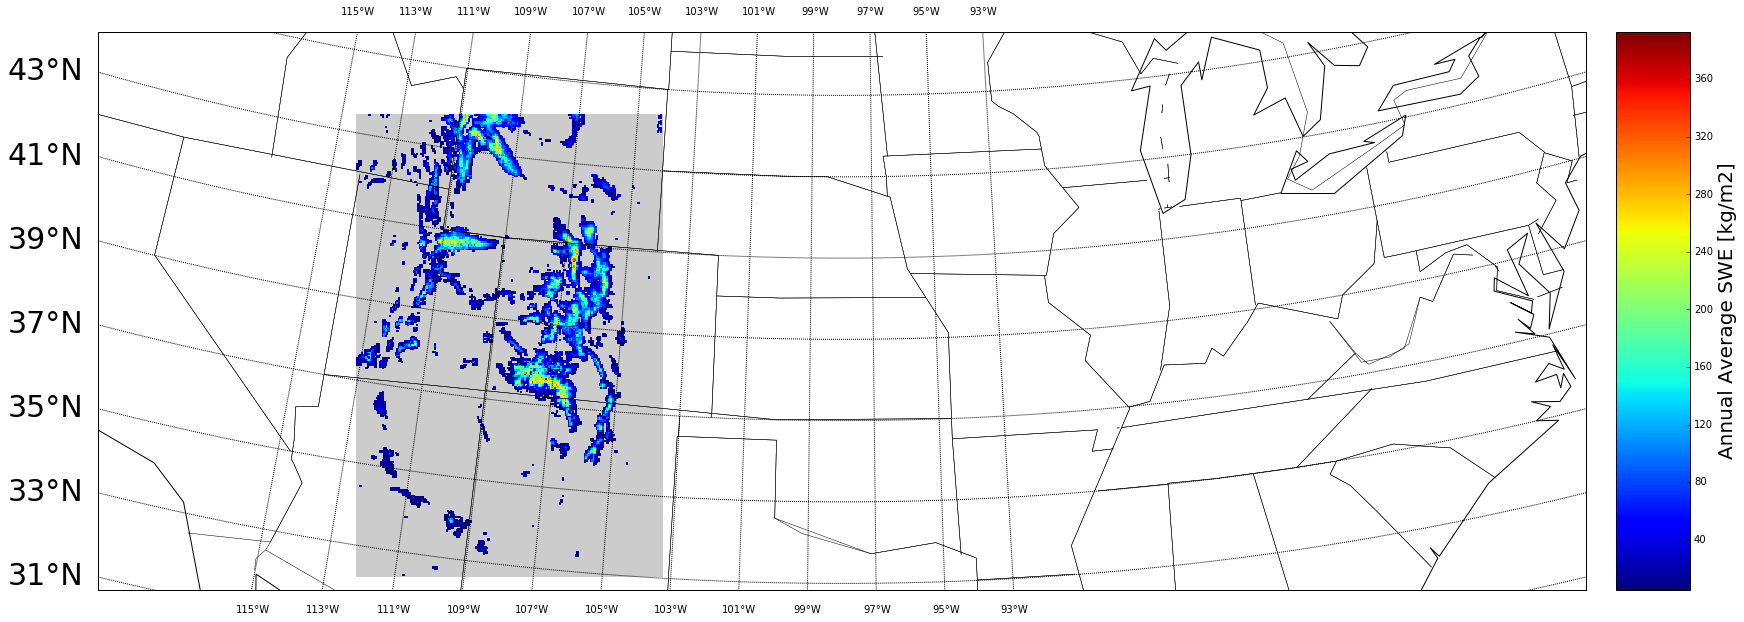

In [16]:
plt.figure(figsize = (60,10))
snow = wrf01['SNOW'][0]
snow[snow<=5] = -9999
snow2 = ma.masked_values(snow,-9999)
map.pcolormesh(X2,Y2,snow2, edgecolor='0.8')
map.pcolormesh(X2,Y2,snow2)
cb = map.colorbar()
cb.set_label('Annual Average SWE [kg/m2]', fontsize=20)
map.drawmeridians(np.arange(-115,-91,2),labels=np.arange(-115,-91,5), fontsize=10);
map.drawparallels(np.arange(31.,47.,2.), labels=[1,0,0,0,0,0,0], fontsize=30,);
map.drawstates();
map.drawcountries();
map.drawcoastlines();

We are confused why the lower edge of the map does not follow the 33 rd parallel, is the best way around this to just subset a larger area and then crop the data later once it has been transformed to WGS84?

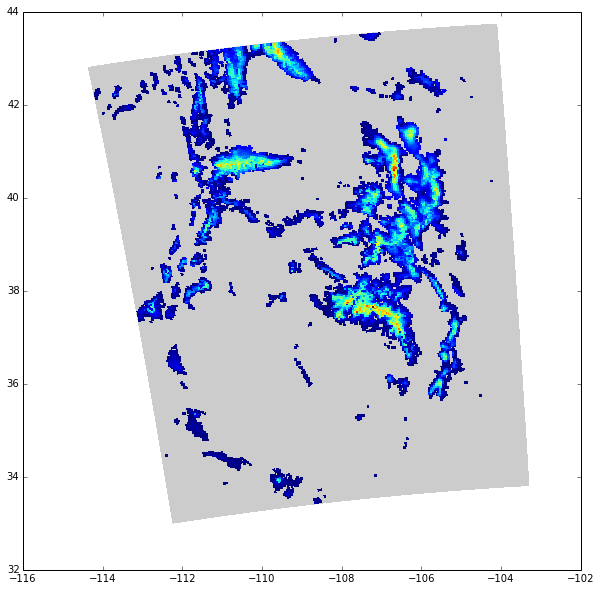

In [13]:
# plot the uprojected WGS84 data
plt.figure(figsize=(10,10));
plt.pcolormesh(XLONGS3,XLATS3,snow2, edgecolor='0.8');
plt.pcolormesh(XLONGS3,XLATS3,snow2);

This plot also appears crooked, which I think is because of the non-uniform lat and long coordinates from the WRF hydro data. 

(0.0, 250.0, 0.0, 300.0)

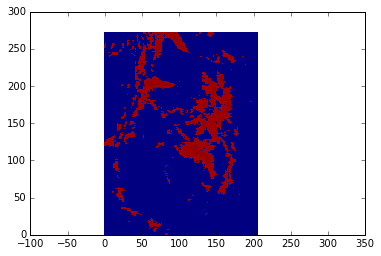

In [14]:
plt.pcolormesh(snow)
plt.axis('equal')

In [ ]:
whos

In [ ]:
X.min()

In [ ]:
X.max()